In [1]:
#6,1.2 SGD
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr #leはlearning rate(学習係数)を表す
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.le * grads[key]

In [2]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

In [3]:
#6.1.5 AdaGrad
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.irems():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [6]:
#6.2.2 隠れ層のアクティベーション分布
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) #1000個のデータ
node_num = 100                 #各隠れ層のノード(ニューロン)の数
hidden_layer_size = 5          #隠れ層が5層
activations = {}               #ここにアクティベーションの結果を格納する

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 1
    
    z = np.dot(x, w)
    a = sigmoid(z) #シグモイド関数
    activations[i] = a

<function matplotlib.pyplot.show(*args, **kw)>

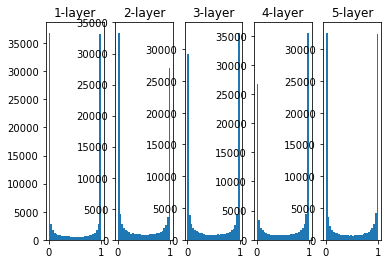

In [8]:
#ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

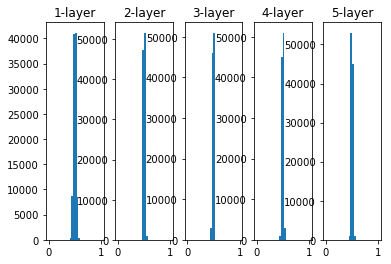

In [9]:
#6.2.2 隠れ層のアクティベーション分布(標準偏差を0.01としたガウス分布の場合)
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) #1000個のデータ
node_num = 100                 #各隠れ層のノード(ニューロン)の数
hidden_layer_size = 5          #隠れ層が5層
activations = {}               #ここにアクティベーションの結果を格納する

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
    w = np.random.randn(node_num, node_num) * 0.01 ##
    
    z = np.dot(x, w)
    a = sigmoid(z) #シグモイド関数
    activations[i] = a
    
#ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

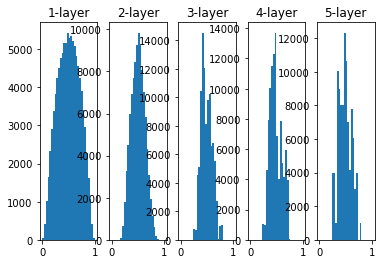

In [10]:
#6.2.2 隠れ層のアクティベーション分布 (前層のノードの個数をnとした場合、1/√nの標準偏差をもつ分布を使う)
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) #1000個のデータ
node_num = 100                 ##前層のノードの数
hidden_layer_size = 5          #隠れ層が5層
activations = {}               #ここにアクティベーションの結果を格納する

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
        
#    w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)

    z = np.dot(x, w)
    a = sigmoid(z) #シグモイド関数
    activations[i] = a
    
#ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show

#上位の層に行くにつれて、これまでよりも広がりを持った分布になる
#よって、シグモイド関数の表現力も制限されることなく、効率的に学習が行えることが期待できる

===========iteration:0===========
std=0.01:2.30255610652
Xavier:2.2970443767
He:2.38825838936
===========iteration:100===========
std=0.01:2.30200483113
Xavier:2.24046095086
He:1.59129118442
===========iteration:200===========
std=0.01:2.30197225135
Xavier:2.10679687452
He:0.784497329701
===========iteration:300===========
std=0.01:2.30137163565
Xavier:1.75828925989
He:0.572692665064
===========iteration:400===========
std=0.01:2.30296514125
Xavier:1.29234271488
He:0.407664676573
===========iteration:500===========
std=0.01:2.30248345855
Xavier:0.845472933753
He:0.375337427606
===========iteration:600===========
std=0.01:2.30284846723
Xavier:0.791487721922
He:0.39968353788
===========iteration:700===========
std=0.01:2.29871053544
Xavier:0.548500123158
He:0.33359714933
===========iteration:800===========
std=0.01:2.29689252002
Xavier:0.378605614674
He:0.176510780942
===========iteration:900===========
std=0.01:2.30321804489
Xavier:0.509934591978
He:0.296931557143
===========iteration:1

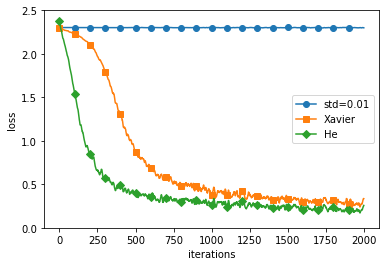

In [12]:
# 6.2.4 MNISTデータセットによる重み初期値の比較

# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

#5層のニューラルネットワーク(各層100個のニューロン)で、活性化関数としてReLUを使用
#std=0.01のときは全く学習ができていない。(順伝播では小さな値が流れ、逆伝播の際に求める勾配も小さくなり、重みの更新がほとんど行われない)
#XavierとHeの初期値の場合は、順調に学習が行われている
#ニューラルネットワークの学習において、重みの初期値は重要で、学習の成否が分かれる。

============== 1/16 ==============
epoch:0 | 0.087 - 0.072


C:\Users\NEC-PCuser\Desktop\ゼロから作るDeep Learning\common\layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)
C:\Users\NEC-PCuser\Desktop\ゼロから作るDeep Learning\common\multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\NEC-PCuser\Desktop\ゼロから作るDeep Learning\common\multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.083
epoch:2 | 0.097 - 0.109
epoch:3 | 0.097 - 0.131
epoch:4 | 0.097 - 0.166
epoch:5 | 0.097 - 0.192
epoch:6 | 0.097 - 0.2
epoch:7 | 0.097 - 0.22
epoch:8 | 0.097 - 0.242
epoch:9 | 0.097 - 0.255
epoch:10 | 0.097 - 0.265
epoch:11 | 0.097 - 0.281
epoch:12 | 0.097 - 0.304
epoch:13 | 0.097 - 0.313
epoch:14 | 0.097 - 0.327
epoch:15 | 0.097 - 0.336
epoch:16 | 0.097 - 0.354
epoch:17 | 0.097 - 0.355
epoch:18 | 0.097 - 0.368
epoch:19 | 0.097 - 0.385
============== 2/16 ==============
epoch:0 | 0.099 - 0.135

C:\Users\NEC-PCuser\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


C:\Users\NEC-PCuser\Desktop\ゼロから作るDeep Learning\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)


epoch:1 | 0.097 - 0.115
epoch:2 | 0.097 - 0.115
epoch:3 | 0.097 - 0.157
epoch:4 | 0.097 - 0.18
epoch:5 | 0.097 - 0.201
epoch:6 | 0.097 - 0.225
epoch:7 | 0.097 - 0.244
epoch:8 | 0.097 - 0.275
epoch:9 | 0.097 - 0.31
epoch:10 | 0.097 - 0.335
epoch:11 | 0.097 - 0.366
epoch:12 | 0.097 - 0.378
epoch:13 | 0.097 - 0.414
epoch:14 | 0.097 - 0.439
epoch:15 | 0.097 - 0.451
epoch:16 | 0.097 - 0.475
epoch:17 | 0.097 - 0.489
epoch:18 | 0.097 - 0.511
epoch:19 | 0.097 - 0.518
============== 3/16 ==============
epoch:0 | 0.112 - 0.102
epoch:1 | 0.384 - 0.15
epoch:2 | 0.506 - 0.192
epoch:3 | 0.602 - 0.266
epoch:4 | 0.671 - 0.305
epoch:5 | 0.742 - 0.34
epoch:6 | 0.789 - 0.363
epoch:7 | 0.825 - 0.407
epoch:8 | 0.871 - 0.439
epoch:9 | 0.9 - 0.467
epoch:10 | 0.919 - 0.494
epoch:11 | 0.934 - 0.506
epoch:12 | 0.946 - 0.534
epoch:13 | 0.961 - 0.558
epoch:14 | 0.969 - 0.584
epoch:15 | 0.968 - 0.598
epoch:16 | 0.977 - 0.613
epoch:17 | 0.982 - 0.63
epoch:18 | 0.985 - 0.633
epoch:19 | 0.986 - 0.654
============== 4

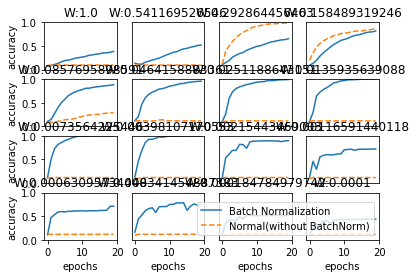

In [13]:
#Batch Normalization
#重みの初期値を適切に設定すれば、各層のアクティベーションの分布は適度な広がりをもつ。
#各層で適度な広がりをもつように"強制的"にアクティベーションの分布を調整する手法をBatch Normaliztionである。

#6.3.2 Batch Normalization の評価
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

#MNISTデータセットを使って、Batch Normレイヤを用いるときと用いないときで、学習の進みがどう変わるかが以下で分かる。

epoch:0, train acc:0.0933333333333, test acc:0.1032
epoch:1, train acc:0.113333333333, test acc:0.1067
epoch:2, train acc:0.146666666667, test acc:0.1111
epoch:3, train acc:0.166666666667, test acc:0.1159
epoch:4, train acc:0.18, test acc:0.1234
epoch:5, train acc:0.196666666667, test acc:0.1327
epoch:6, train acc:0.233333333333, test acc:0.147
epoch:7, train acc:0.253333333333, test acc:0.1615
epoch:8, train acc:0.286666666667, test acc:0.1856
epoch:9, train acc:0.333333333333, test acc:0.2062
epoch:10, train acc:0.363333333333, test acc:0.22
epoch:11, train acc:0.373333333333, test acc:0.2336
epoch:12, train acc:0.406666666667, test acc:0.2509
epoch:13, train acc:0.436666666667, test acc:0.2715
epoch:14, train acc:0.446666666667, test acc:0.2893
epoch:15, train acc:0.47, test acc:0.3127
epoch:16, train acc:0.493333333333, test acc:0.3243
epoch:17, train acc:0.503333333333, test acc:0.331
epoch:18, train acc:0.513333333333, test acc:0.3488
epoch:19, train acc:0.526666666667, test acc:

epoch:166, train acc:0.89, test acc:0.6903
epoch:167, train acc:0.896666666667, test acc:0.693
epoch:168, train acc:0.883333333333, test acc:0.6875
epoch:169, train acc:0.883333333333, test acc:0.6872
epoch:170, train acc:0.9, test acc:0.6853
epoch:171, train acc:0.89, test acc:0.6871
epoch:172, train acc:0.893333333333, test acc:0.6887
epoch:173, train acc:0.903333333333, test acc:0.6864
epoch:174, train acc:0.896666666667, test acc:0.6897
epoch:175, train acc:0.883333333333, test acc:0.6883
epoch:176, train acc:0.9, test acc:0.6803
epoch:177, train acc:0.903333333333, test acc:0.6952
epoch:178, train acc:0.893333333333, test acc:0.6883
epoch:179, train acc:0.903333333333, test acc:0.6975
epoch:180, train acc:0.886666666667, test acc:0.6948
epoch:181, train acc:0.896666666667, test acc:0.6904
epoch:182, train acc:0.893333333333, test acc:0.6887
epoch:183, train acc:0.89, test acc:0.6878
epoch:184, train acc:0.893333333333, test acc:0.6911
epoch:185, train acc:0.896666666667, test acc:

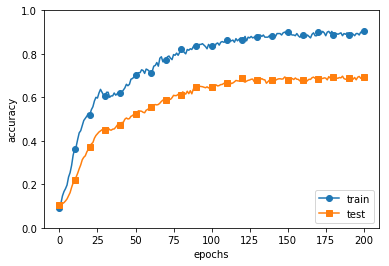

In [14]:
#6.4.1 過学習
#過学習が起きる条件として、主に
#"パラメータを大量に持ち、表現力の高いモデルであること"、"訓練データが少ないこと"が挙げられる


#意図的に、過学習を発生させる (MNIST訓練データ：60000個→300個、7層のネットワーク・各層のニューロンは100個(複雑性up)、ReLU関数)

# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

#Weight decayを用いなかった結果と比べると、trainとtestの隔たりは小さくなっている
#また訓練データの認識制度が100%に達していない点も注目すべき点である

val acc:0.19 | lr:0.00044969446245181913, weight decay:2.415480159559796e-08
val acc:0.08 | lr:1.3039635192056721e-06, weight decay:3.594600091794006e-05
val acc:0.19 | lr:0.0007421457143877607, weight decay:5.751855534167171e-05
val acc:0.07 | lr:0.0006836195658118076, weight decay:2.02073628393878e-06
val acc:0.06 | lr:8.727438979779452e-05, weight decay:5.531015756786011e-05
val acc:0.14 | lr:0.0001036040386567161, weight decay:3.7998327219580226e-05
val acc:0.4 | lr:0.001818322550468391, weight decay:6.368703891563594e-08
val acc:0.13 | lr:1.0127616165864485e-06, weight decay:5.695839592100893e-06
val acc:0.06 | lr:8.924181221277929e-05, weight decay:3.242240959960647e-05
val acc:0.09 | lr:0.000564919139085228, weight decay:2.5024150806456768e-08
val acc:0.13 | lr:0.0004914180395500771, weight decay:6.618547920424559e-06
val acc:0.09 | lr:0.00011093872111961682, weight decay:5.974164429693004e-06
val acc:0.15 | lr:7.02084232465683e-05, weight decay:4.4942633089744636e-08
val acc:0.

Best-11(val acc:0.63) | lr:0.005621387251938938, weight decay:2.0126697012561417e-05
Best-12(val acc:0.62) | lr:0.0036589182600502254, weight decay:7.714133171948515e-06
Best-13(val acc:0.56) | lr:0.004751003931570179, weight decay:3.078894046281172e-08
Best-14(val acc:0.49) | lr:0.00309888968609222, weight decay:4.054195045343696e-05
Best-15(val acc:0.4) | lr:0.001818322550468391, weight decay:6.368703891563594e-08
Best-16(val acc:0.39) | lr:0.0011189667888368323, weight decay:2.6240556797827608e-05
Best-17(val acc:0.36) | lr:0.002538445809206791, weight decay:1.6076356252899224e-07
Best-18(val acc:0.31) | lr:0.0017565029700786178, weight decay:1.3131326446940422e-08
Best-19(val acc:0.27) | lr:0.0014165104575513895, weight decay:4.6935734895552944e-05
Best-20(val acc:0.25) | lr:0.0007763046095142844, weight decay:4.261591096482863e-08


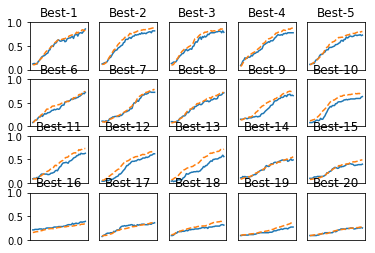

In [15]:
#6.5.3 ハイパーパラメータ最適化の実装
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

# 検証データの分離
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()
